In [6]:
%run making_difumo_rita.py 

Start processing sub-StrokeR01001S......
[NiftiMapsMasker.fit_transform] loading regions from /home/htpeng2/nilearn_data/difumo_atlases/64/2mm/maps.nii.gz
Resampling maps
[NiftiMapsMasker.transform_single_imgs] Loading data from data/fMRI/sub-StrokeR01001S_ses-A_task-rest_dir-PA_run-1_bold.nii.gz
[NiftiMapsMasker.transform_single_imgs] Extracting region signals
[NiftiMapsMasker.transform_single_imgs] Cleaning extracted signals
Start processing sub-StrokeR01002S......
[NiftiMapsMasker.fit_transform] loading regions from /home/htpeng2/nilearn_data/difumo_atlases/64/2mm/maps.nii.gz
Resampling maps
[NiftiMapsMasker.transform_single_imgs] Loading data from data/fMRI/sub-StrokeR01002S_ses-A_task-rest_dir-PA_run-1_bold.nii.gz
[NiftiMapsMasker.transform_single_imgs] Extracting region signals
[NiftiMapsMasker.transform_single_imgs] Cleaning extracted signals
Start processing sub-StrokeR01004C......
[NiftiMapsMasker.fit_transform] loading regions from /home/htpeng2/nilearn_data/difumo_atlases/64

In [7]:
pwd

'/home/htpeng2/Desktop/Multimodal/NeuroBOLT'

In [8]:
import pandas as pd

file_path = "/home/htpeng2/Desktop/Multimodal/NeuroBOLT/data/fMRI_difumo/sub-StrokeR01001S_difumo_roi.pkl"  # Replace with your actual file path
df = pd.read_pickle(file_path)

# Display first few rows
print(df.head())

# Show column names
print(df.columns)


Difumo_names  Superior frontal sulcus  Fusiform gyrus  \
0                            4.104874       -0.432762   
1                            0.780024        1.175232   
2                           -0.215405       -0.351879   
3                            1.295067        0.266277   
4                           -1.190832        0.553580   

Difumo_names  Calcarine cortex posterior  Cingulate cortex posterior  \
0                               1.093087                    0.463193   
1                               0.298475                    1.782955   
2                              -0.463695                   -0.069290   
3                              -0.929048                    1.309211   
4                              -0.767120                    1.326753   

Difumo_names  Parieto-occipital sulcus superior  Insula antero-superior  \
0                                      2.110040                3.613538   
1                                      2.235068                0.502859   

Index(['Superior frontal sulcus', 'Fusiform gyrus',
       'Calcarine cortex posterior', 'Cingulate cortex posterior',
       'Parieto-occipital sulcus superior', 'Insula antero-superior',
       'Superior temporal sulcus with angular gyrus', 'Planum temporale',
       'Cerebellum Crus II',
       'Superior parts of Postcentral and Precentral gyri', 'Transverse sinus',
       'Paracentral gyrus RH', 'Superior occipital gyrus',
       'Cingulate gyrus mid-posterior', 'ventricles',
       'Fusiform gyrus posterior', 'Superior frontal gyrus medial',
       'Precuneus superior', 'Planum polare',
       'Parieto-occipital sulcus middle', 'Cerebellum I-V',
       'Superior fornix and isthmus', 'Anterior Cingulate Cortex',
       'Descending occipital gyrus', 'Putamen', 'Cingulate gyrus mid-anterior',
       'Superior parietal lobule posterior', 'Paracentral lobule',
       'Inferior occipital gyrus', 'Superior rostral gyrus',
       'Calcarine sulcus anterior', 'Intraparietal sulcus',
      

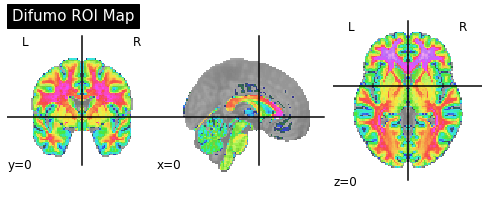

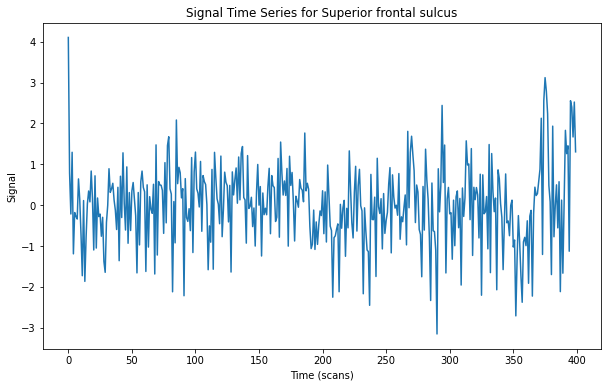

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.input_data import NiftiLabelsMasker

# Load the .pkl file
file_path = './data/fMRI_difumo/sub-StrokeR01001S_difumo_roi.pkl'  # Replace with the actual path to your pkl file
df = pd.read_pickle(file_path)

# Check the columns in the dataframe (which are the region names)
print(df.columns)

# Assuming you have a Nifti image with ROI information (maps_img), e.g., loaded from Difumo
# Here we'll use a sample Nifti file for demonstration purposes
from nilearn import datasets
mni_template = datasets.load_mni152_template()

# Plot the fMRI ROI map with the labels from your .pkl file
plotting.plot_roi(mni_template, title="Difumo ROI Map", display_mode='ortho', cut_coords=(0, 0, 0))

# To visualize individual regions
# You can get a specific region signal from the dataframe and visualize its distribution
# Example for the first region:
region_name = df.columns[0]  # Replace with your desired region name
region_signal = df[region_name]  # Get the signal for that region

# Plot the region signal (time series)
plt.figure(figsize=(10, 6))
plt.plot(region_signal)
plt.title(f"Signal Time Series for {region_name}")
plt.xlabel("Time (scans)")
plt.ylabel("Signal")
plt.show()

# Show the ROI plot
plotting.show()



Dataset created in /home/htpeng2/nilearn_data/fsl



Downloaded 22552576 of 25716861 bytes (87.7%,    0.3s remaining) ...done. (5 seconds, 0 min)
Extracting data from /home/htpeng2/nilearn_data/fsl/6d66ca02eb65898a3151e67dfd70c18f/HarvardOxford.tgz.../usr/lib64/python3.6/tarfile.py:2251: RuntimeWarning: The default behavior of tarfile extraction has been changed to disallow common exploits (including CVE-2007-4559). By default, absolute/parent paths are disallowed and some mode bits are cleared. See https://access.redhat.com/articles/7004769 for more details.
  RuntimeWarning)
.. done.


Available regions in the atlas: /home/htpeng2/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-sub-maxprob-thr50-1mm.nii.gz


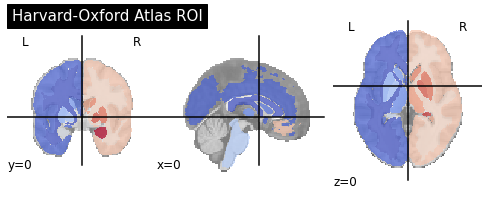

In [17]:
from nilearn import plotting, datasets
from nilearn.input_data import NiftiLabelsMasker

# Load the MNI152 template (standard brain template)
mni_template = datasets.load_mni152_template()

# Load an existing brain region atlas, for example, Harvard-Oxford sub-cortical regions
# You can replace this with any other brain region atlas you prefer
harvard_oxford = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr50-1mm')

# Display the regions in the Harvard-Oxford atlas (or another suitable atlas)
print(f"Available regions in the atlas: {harvard_oxford.filename}")

# Load the mask (NIfTI file) for the regions in the atlas
atlas_filename = harvard_oxford.filename

# Plot the ROI for a specific region in the atlas (for example, 'Superior frontal sulcus')
# You can choose a specific label from the atlas if you know the region of interest (ROI)
# Here, let's just visualize the whole atlas mask for demonstration.

# Visualizing the region
plotting.plot_roi(atlas_filename, title="Harvard-Oxford Atlas ROI", display_mode='ortho', cut_coords=(0, 0, 0), cmap='coolwarm')

# Show the plot
plotting.show()


In [2]:
%run main_rita.py

ModuleNotFoundError: No module named 'timm'

In [1]:
import argparse
import datetime
from pyexpat import model
import numpy as np
import time
import torch
import torch.backends.cudnn as cudnn
import json
import os
import pandas as pd

from pathlib import Path
from collections import OrderedDict
from timm.data.mixup import Mixup
from timm.models import create_model
from timm.loss import LabelSmoothingCrossEntropy, SoftTargetCrossEntropy
from timm.utils import ModelEma
from optim_factory import create_optimizer, get_parameter_groups, LayerDecayValueAssigner

from engine import train_one_epoch, evaluate
from utils import NativeScalerWithGradNormCount as NativeScaler
import utils
from dataset_maker import get_datasets
from scipy import interpolate
import models.model

ModuleNotFoundError: No module named 'timm'

In [2]:
import sys
print(sys.executable)

/usr/bin/python3


In [2]:
import sys
print(sys.path)


['/usr/lib64/python36.zip', '/usr/lib64/python3.6', '/usr/lib64/python3.6/lib-dynload', '', '/home/htpeng2/.local/lib/python3.6/site-packages', '/usr/lib64/python3.6/site-packages', '/usr/lib/python3.6/site-packages', '/home/htpeng2/.local/lib/python3.6/site-packages/IPython/extensions', '/home/htpeng2/.ipython']
